# Analysis

In [1]:
import pandas as pd
import plotnine as pn


In [2]:
# Load data

# Pareto frontier
curve_fn = "/Users/nathanielimel/lps/projects/rdsg/outputs/states=10/signals=10/similarity=nosofsky/distortion=squared_dist/curve_points.csv"

# Counterpart points
counterpart_fn = "/Users/nathanielimel/lps/projects/rdsg/outputs/states=10/signals=10/similarity=nosofsky/distortion=squared_dist/counterpart_points.csv"

# Explored hypothetical systems
sampled_fn = "/Users/nathanielimel/lps/projects/rdsg/outputs/states=10/signals=10/similarity=nosofsky/distortion=squared_dist/sampled_points.csv"

# simulation points
alphas = [
    0, 
    2, 
    4, 
    6, 
    8, 
    10,
    ]

# Learned
dynamic = "reinforcement_learning"
# dynamic = "replicator_dynamic"
num_trials = 10
# num_trials = 100

alpha_fns = {
    f"{float(alpha)}":f"/Users/nathanielimel/lps/projects/rdsg/multirun/states=10/signals=10/similarity=nosofsky/distortion=squared_dist/dynamics={dynamic}/num_trials={num_trials}/sim_param={alpha}/simulation_points.csv"
    for alpha in alphas
}



In [3]:
# load dataframes
curve_data = pd.read_csv(curve_fn)
counterpart_data = pd.read_csv(counterpart_fn)
sampled_data = pd.read_csv(sampled_fn)

simulation_dataframes = {
    k: pd.read_csv(alpha_fns[k]) for k in alpha_fns
}

In [4]:
# combine simulation dataframes
for key in simulation_dataframes:
    df = simulation_dataframes[key]
    df["alpha"] = key # use string for category

sim_data = pd.concat(simulation_dataframes.values())
sim_data

,rate,distortion,round,alpha
0,0.010012,16.523576,0,0.0
1,0.010012,16.523576,1,0.0
2,0.010012,16.523576,2,0.0
3,0.010012,16.523576,3,0.0
4,0.010012,16.523576,4,0.0
...,...,...,...,...
999995,0.388343,8.365978,99995,10.0
999996,0.388340,8.365887,99996,10.0
999997,0.388350,8.365809,99997,10.0
999998,0.388349,8.365760,99998,10.0


In [5]:
sim_data["alpha"] = sim_data["alpha"].astype(float)
sim_data["alpha"] = sim_data["alpha"].astype(str)
counterpart_data["alpha"] = counterpart_data["alpha"].astype(float)
counterpart_data["alpha"] = counterpart_data["alpha"].astype(str)

sim_data

,rate,distortion,round,alpha
0,0.010012,16.523576,0,0.0
1,0.010012,16.523576,1,0.0
2,0.010012,16.523576,2,0.0
3,0.010012,16.523576,3,0.0
4,0.010012,16.523576,4,0.0
...,...,...,...,...
999995,0.388343,8.365978,99995,10.0
999996,0.388340,8.365887,99996,10.0
999997,0.388350,8.365809,99997,10.0
999998,0.388349,8.365760,99998,10.0


In [6]:
# plot each language, with a unique color for each gamma

counterpart_data = counterpart_data.assign(
        alpha=pd.Categorical(
            counterpart_data["alpha"], 
            categories=[g for g in simulation_dataframes.keys()]
        )
    )

sim_data = sim_data.assign(
        alpha=pd.Categorical(
            sim_data["alpha"], 
            categories=[g for g in simulation_dataframes.keys()]
        )
    )  # preserve order in legend

# Language keys
sim_data["language"] = {"reinforcement_learning": "learned", "replicator_dynamic": "evolved"}[dynamic]
sampled_data["language"] = "hypothetical"
counterpart_data["language"] = "optimal counterpart"
all_data = pd.concat([counterpart_data, sim_data])

# Trajectory keys
sim_data["time step"] = sim_data["round"]

counterpart_data


,rate,distortion,beta,alpha,language
0,3.321928,0.000000,1000.000000,0.0,optimal counterpart
1,0.963131,1.822883,0.250000,2.0,optimal counterpart
2,0.057531,7.616357,0.062500,4.0,optimal counterpart
3,0.004647,8.272144,0.027778,6.0,optimal counterpart
4,0.001560,8.380513,0.015625,8.0,optimal counterpart
5,0.000757,8.463557,0.010000,10.0,optimal counterpart


In [7]:
plot = (
    # Set data and the axes
    pn.ggplot(
        data=curve_data, mapping=pn.aes(x="rate", y="distortion")
    )  
    + pn.geom_point(  # sampled langs
        sampled_data,
        pn.aes(shape="language"),
        color="gray",
        size=1,
        alpha=0.1,
    )        
    + pn.geom_jitter( # simulation langs
        data=sim_data,
        mapping=pn.aes(
            color="alpha", 
            shape="language",
            ),
        alpha=0.3,
        size=3,
        # height=0.1,
    )
    + pn.geom_line(size=1) # pareto data       
    + pn.geom_point( # theoretical bound langs last
        data=counterpart_data,
        mapping=pn.aes(
            color="alpha",
            shape="language",
            ),
        size=4,
    )    
    + pn.xlab("Complexity $I(S;\hat{S})$")
    + pn.ylab("Communicative Cost $D[S, \hat{S}]$")
)
print(plot)

KeyboardInterrupt: 

In [ ]:
# Save plot (will overwrite!)

# plot_save_dir = f"/Users/nathanielimel/lps/projects/rdsg/multirun/states=10/signals=10/similarity=nosofsky/distortion=squared_dist/dynamics={dynamic}/num_trials={num_trials}"
# fn = plot_save_dir + "/multiple_alpha.png"
# plot.save(filename=fn, width=10, height=10, dpi=300)

## Plot trajectories

In [8]:
# Load data
mean_traj_fns = {
    key: val.replace("simulation_points", "mean_points") for key, val in alpha_fns.items()
}

mean_traj_dataframes = {
    k: pd.read_csv(mean_traj_fns[k]) for k in mean_traj_fns
}

# combine simulation dataframes
for key in mean_traj_dataframes:
    df = mean_traj_dataframes[key]
    df["alpha"] = key # use string for category

mean_traj_data = pd.concat(mean_traj_dataframes.values())
mean_traj_data = mean_traj_data.dropna() # unnecessary if all files were trajectories
mean_traj_data

,rate,distortion,round,alpha
0,0.007626,16.508234,0,0.0
1,0.007796,16.505629,1,0.0
2,0.007968,16.487784,2,0.0
3,0.007968,16.487784,3,0.0
4,0.007968,16.487784,4,0.0
...,...,...,...,...
99995,0.272727,10.487694,99995,10.0
99996,0.272726,10.487665,99996,10.0
99997,0.272729,10.487624,99997,10.0
99998,0.272728,10.487634,99998,10.0


In [9]:
# Plot trajectories, one for each alpha
mean_traj_data = mean_traj_data.assign(
    alpha=pd.Categorical(
        mean_traj_data["alpha"],
        categories=[g for g in simulation_dataframes.keys()]
    )
)

mean_traj_data["language"] = {"reinforcement_learning": "learned", "replicator_dynamic": "evolved"}[dynamic]



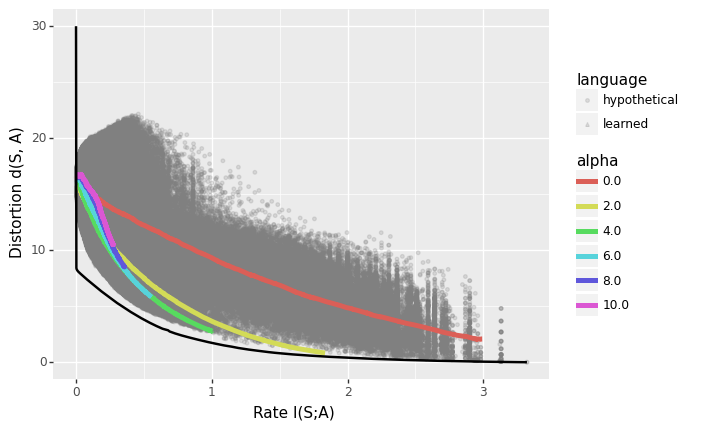

In [10]:
plot = (
    # Set data and the axes
    pn.ggplot(
            data=curve_data, mapping=pn.aes(x="rate", y="distortion")
    )  # pareto data    
    + pn.geom_point(  # sampled langs
        sampled_data,
        pn.aes(shape="language"),
        color="gray",
        # shape="o",
        size=1,
        alpha=0.2,
    )        
    + pn.geom_line(  # simulation langs
        data=mean_traj_data,
        mapping=pn.aes(color="alpha", shape="language"),
        # shape="o",
        alpha=1.0,
        size=2,
    )
    + pn.geom_line(size=1) # pareto last
    + pn.xlab("Rate I(S;A)")
    + pn.ylab("Distortion d(S, A)")
)
print(plot)

In [11]:
# # Save plot (will overwrite!)

# plot_save_dir = f"/Users/nathanielimel/lps/projects/rdsg/multirun/states=10/signals=10/similarity=nosofsky/distortion=squared_dist/dynamics={dynamic}/num_trials={num_trials}"
# fn = plot_save_dir + "/alpha_trajectories.png"
# plot.save(filename=fn, width=10, height=10, dpi=300)

/Users/nathanielimel/miniforge3/envs/rdsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 10 x 10 in image.
/Users/nathanielimel/miniforge3/envs/rdsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: /Users/nathanielimel/lps/projects/rdsg/multirun/states=10/signals=10/similarity=nosofsky/distortion=squared_dist/dynamics=reinforcement_learning/num_trials=10/alpha_trajectories.png
